In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import re

In [4]:
file_lnc = pd.read_table('/home/boralli/workdir/pipeline_v4/FEELNC/CLASSIFIER/lncRNA_classes.txt')
file_lnc

,isBest,lncRNA_gene,lncRNA_transcript,partnerRNA_gene,partnerRNA_transcript,direction,type,distance,subtype,location
0,1,MSTRG.39394,MSTRG.39394.1,ENSG00000271151.1,ENST00000605739.1,strand_unknow,intergenic,982,unknow strand(s),upstream
1,0,MSTRG.39394,MSTRG.39394.1,ENSG00000172845.15,ENST00000418194.6,strand_unknow,intergenic,2943,unknow strand(s),upstream
2,0,MSTRG.39394,MSTRG.39394.1,ENSG00000172845.15,ENST00000310015.11,strand_unknow,intergenic,1460,unknow strand(s),upstream
3,0,MSTRG.39394,MSTRG.39394.1,ENSG00000172845.15,ENST00000640958.1,strand_unknow,intergenic,3327,unknow strand(s),upstream
4,0,MSTRG.39394,MSTRG.39394.1,ENSG00000172845.15,ENST00000462904.1,strand_unknow,intergenic,1852,unknow strand(s),upstream
...,...,...,...,...,...,...,...,...,...,...
322074,0,MSTRG.56786,MSTRG.56786.1,ENSG00000083097.14,ENST00000349129.6,antisense,genic,0,overlapping,exonic
322075,0,MSTRG.56786,MSTRG.56786.1,ENSG00000013375.16,ENST00000509219.2,sense,genic,0,overlapping,exonic
322076,1,MSTRG.46816,MSTRG.46816.1,ENSG00000185565.12,ENST00000474851.1,strand_unknow,genic,0,nested,intronic
322077,1,MSTRG.40455,ENST00000412747.1,ENSG00000233751.1,ENST00000412747.1,sense,genic,0,containing,exonic


In [5]:
filtered_lnc_teste = file_lnc['isBest'] == 1
filtered_lnc = file_lnc[filtered_lnc_teste]
filtered_lnc

,isBest,lncRNA_gene,lncRNA_transcript,partnerRNA_gene,partnerRNA_transcript,direction,type,distance,subtype,location
0,1,MSTRG.39394,MSTRG.39394.1,ENSG00000271151.1,ENST00000605739.1,strand_unknow,intergenic,982,unknow strand(s),upstream
9,1,MSTRG.66360,MSTRG.66360.9,ENSG00000090054.15,ENST00000262554.7,sense,genic,0,nested,exonic
17,1,MSTRG.62422,MSTRG.62422.1,ENSG00000104299.15,ENST00000416984.6,strand_unknow,genic,0,nested,intronic
29,1,MSTRG.51329,MSTRG.51329.1,ENSG00000288025.1,ENST00000664814.1,strand_unknow,intergenic,436,unknow strand(s),downstream
32,1,MSTRG.27993,MSTRG.27993.1,ENSG00000103089.9,ENST00000562145.1,strand_unknow,intergenic,364,unknow strand(s),downstream
...,...,...,...,...,...,...,...,...,...,...
322050,1,MSTRG.57145,MSTRG.57145.1,ENSG00000081087.15,ENST00000440575.6,strand_unknow,genic,0,nested,intronic
322053,1,ENSG00000233307.1,ENST00000443436.1,ENSG00000233307.1,ENST00000443436.1,sense,genic,0,containing,exonic
322055,1,MSTRG.56786,MSTRG.56786.1,ENSG00000013375.16,ENST00000512866.5,sense,genic,0,overlapping,exonic
322076,1,MSTRG.46816,MSTRG.46816.1,ENSG00000185565.12,ENST00000474851.1,strand_unknow,genic,0,nested,intronic


genic         29961
intergenic    15692
Name: type, dtype: int64

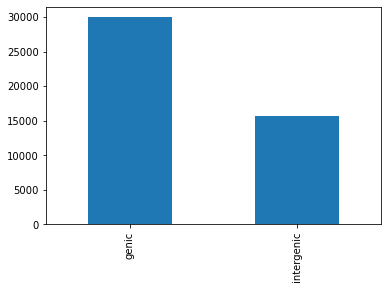

In [6]:
filtered_lnc['type'].value_counts().plot(kind='bar')
filtered_lnc['type'].value_counts()


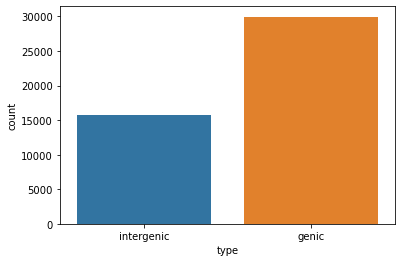

In [7]:
sns.countplot(data=filtered_lnc, x='type')
plt.savefig('count_type_lncRNA.png', bbox_inches='tight')

In [8]:
#Selecting only new lncRNAs
filter_news = filtered_lnc['lncRNA_transcript'].str.match(r'^M')
filtered_lnc_news = filtered_lnc[filter_news]
filtered_lnc_news

,isBest,lncRNA_gene,lncRNA_transcript,partnerRNA_gene,partnerRNA_transcript,direction,type,distance,subtype,location
0,1,MSTRG.39394,MSTRG.39394.1,ENSG00000271151.1,ENST00000605739.1,strand_unknow,intergenic,982,unknow strand(s),upstream
9,1,MSTRG.66360,MSTRG.66360.9,ENSG00000090054.15,ENST00000262554.7,sense,genic,0,nested,exonic
17,1,MSTRG.62422,MSTRG.62422.1,ENSG00000104299.15,ENST00000416984.6,strand_unknow,genic,0,nested,intronic
29,1,MSTRG.51329,MSTRG.51329.1,ENSG00000288025.1,ENST00000664814.1,strand_unknow,intergenic,436,unknow strand(s),downstream
32,1,MSTRG.27993,MSTRG.27993.1,ENSG00000103089.9,ENST00000562145.1,strand_unknow,intergenic,364,unknow strand(s),downstream
...,...,...,...,...,...,...,...,...,...,...
322004,1,MSTRG.15191,MSTRG.15191.15,ENSG00000175581.14,ENST00000310614.12,sense,genic,0,overlapping,exonic
322037,1,MSTRG.30611,MSTRG.30611.1,ENSG00000279069.1,ENST00000624641.1,strand_unknow,intergenic,6603,unknow strand(s),downstream
322050,1,MSTRG.57145,MSTRG.57145.1,ENSG00000081087.15,ENST00000440575.6,strand_unknow,genic,0,nested,intronic
322055,1,MSTRG.56786,MSTRG.56786.1,ENSG00000013375.16,ENST00000512866.5,sense,genic,0,overlapping,exonic


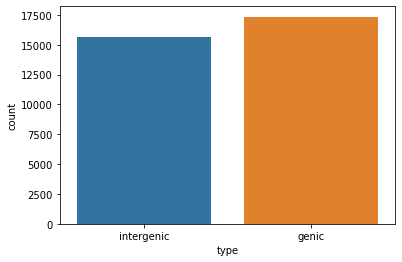

In [9]:
filtered_lnc_news['type'].value_counts()
sns.countplot(data=filtered_lnc_news, x='type', )
plt.savefig('count_type_novellncRNA.png', bbox_inches='tight')

In [10]:
filtered_lnc_news['type'].value_counts()

genic         17356
intergenic    15692
Name: type, dtype: int64